# Spotify Data Visualization

## 1.1 Importing data and libraries

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from dask import dataframe as dd
%matplotlib inline

In [3]:
# reading a file as a pandas dataframe requires 13 GB+ memory alocation. The file loaded this way is too large.
# reading a file as a dask dataframe due to size with a dtypes choosed by default pandas reader
# more about dask in dataframes: https://docs.dask.org/en/stable/dataframe.html

dask_dataframe = dd.read_csv('spotify_charts.csv', 
                     dtype=object)

## 1.2 Data exploration and optimization stage

In [4]:
# dask dataframe size info

dask_dataframe.info(memory_usage='deep')


<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, title to streams
dtypes: object(9)
memory usage: 1.8 GB


In [5]:
dask_dataframe.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956


In [6]:
# checking the number of unique values 

for col in dask_dataframe.columns:
    print(f'unique values in {col}: {dask_dataframe[col].nunique().compute()}')
    
# its longer to compute every single column in dask dataframe but working with a 13 GB pandas dataframe is avoided. 

unique values in title: 164758
unique values in rank: 200
unique values in date: 1826
unique values in artist: 96115
unique values in url: 217644
unique values in region: 70
unique values in chart: 2
unique values in trend: 4
unique values in streams: 788013


In [7]:
# changing of data types from object to category/int for elements that have relatively few unique values (in comparison to number of all entries)

to_category_cols = ['title', 'url', 'artist', 'region', 'trend', 'chart']
to_datetime64_cols = ['date']
to_int32_cols = ['rank']

for col in to_category_cols:
    dask_dataframe[col] = dask_dataframe[col].astype('category')
        
for col in to_int32_cols:
    dask_dataframe[col] = dask_dataframe[col].astype('int32')
    
for col in to_datetime64_cols:
    dask_dataframe[col] = dask_dataframe[col].astype('datetime64')


In [8]:
# rechecking dask dataframe size info

dask_dataframe.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, title to streams
dtypes: category(6), datetime64[ns](1), object(1), int32(1)
memory usage: 813.4 MB


In [9]:
# pandas dataframe size info

dataframe = dask_dataframe.compute()

dataframe.info(memory_usage='deep')

# file is much smaller and after first steps of optimization is possible to work on pandas dataframe again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26147953 entries, 0 to 498950
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    category      
 1   rank     int32         
 2   date     datetime64[ns]
 3   artist   category      
 4   url      category      
 5   region   category      
 6   chart    category      
 7   trend    category      
 8   streams  object        
dtypes: category(6), datetime64[ns](1), int32(1), object(1)
memory usage: 2.2 GB


In [10]:
# checking the number of NaN values 

for col in dataframe.columns:
    print(f'NaN values in {col}: {dataframe[col].isna().sum()}')
    

NaN values in title: 11
NaN values in rank: 0
NaN values in date: 0
NaN values in artist: 18
NaN values in url: 0
NaN values in region: 1
NaN values in chart: 1
NaN values in trend: 1
NaN values in streams: 5826049


In [11]:
# preparing a NaN values filters

title_is_nan = dataframe['title'].isna()
artist_is_nan = dataframe['artist'].isna()
region_is_nan = dataframe['region'].isna()
chart_is_nan = dataframe['chart'].isna()
trend_is_nan = dataframe['trend'].isna()
streams_is_nan = dataframe['streams'].isna()


In [12]:
# NaN data exploratiom
dataframe[title_is_nan].head(3)

,title,rank,date,artist,url,region,chart,trend,streams
72604,NaN,120,2019-06-24,Nissy,https://open.spotify.com/track/4cP6KmNvTFkLHZo...,Japan,top200,NEW_ENTRY,11942
169157,NaN,167,2019-06-25,Nissy,https://open.spotify.com/track/4cP6KmNvTFkLHZo...,Japan,top200,MOVE_DOWN,10310
246763,NaN,128,2019-06-26,Nissy,https://open.spotify.com/track/4cP6KmNvTFkLHZo...,Japan,top200,MOVE_UP,11620


In [13]:
# NaN data exploratiom
dataframe[artist_is_nan].head(3)

,title,rank,date,artist,url,region,chart,trend,streams
291605,NO GOOD,10,2020-07-13,NaN,https://open.spotify.com/track/4Qnz8tARYhUtDNe...,Japan,viral50,NEW_ENTRY,NaN
311398,NO GOOD,10,2020-07-14,NaN,https://open.spotify.com/track/4Qnz8tARYhUtDNe...,Japan,viral50,SAME_POSITION,NaN
335035,NO GOOD,10,2020-07-15,NaN,https://open.spotify.com/track/4Qnz8tARYhUtDNe...,Japan,viral50,SAME_POSITION,NaN


In [14]:
# NaN data exploratiom
dataframe[region_is_nan].head(3)

,title,rank,date,artist,url,region,chart,trend,streams
498950,Tengo La Personalidad,47,2021-07-24,Chikybombom La Pantera,https://open.spotify.com/trac,NaN,NaN,NaN,NaN


In [15]:
# NaN data exploratiom
dataframe[chart_is_nan].head(3)

,title,rank,date,artist,url,region,chart,trend,streams
498950,Tengo La Personalidad,47,2021-07-24,Chikybombom La Pantera,https://open.spotify.com/trac,NaN,NaN,NaN,NaN


In [16]:
# NaN data exploratiom
dataframe[trend_is_nan].head(3)

,title,rank,date,artist,url,region,chart,trend,streams
498950,Tengo La Personalidad,47,2021-07-24,Chikybombom La Pantera,https://open.spotify.com/trac,NaN,NaN,NaN,NaN


In [17]:
# NaN data exploratiom
dataframe[streams_is_nan].sample(5)

,title,rank,date,artist,url,region,chart,trend,streams
258837,Loco,1,2019-10-17,Beéle,https://open.spotify.com/track/2J9B63FawlTaPdg...,Costa Rica,viral50,SAME_POSITION,NaN
48450,Not For Me,50,2020-11-07,Maris Racal,https://open.spotify.com/track/6Q7gbt3fBClwFmy...,Philippines,viral50,NEW_ENTRY,NaN
300310,You Already Know,7,2019-07-31,"Shotgun Willy, Yung Craka",https://open.spotify.com/track/0ICY4TtDdjDd0kS...,New Zealand,viral50,SAME_POSITION,NaN
15498,Harami,32,2019-05-07,Samra,https://open.spotify.com/track/5xIODxqlpUnRVA9...,Switzerland,viral50,SAME_POSITION,NaN
425530,Into The Blue,36,2017-09-26,Rationale,https://open.spotify.com/track/3EYiv7DfJ7V0aRA...,Czech Republic,viral50,MOVE_UP,NaN


In [18]:
# checking if 'streams' contains any '0' values

streams_is_null = dataframe['streams'] == 0

len(dataframe[streams_is_null])



0

In [19]:
# replacing NaN values with a zeros without losing any data

dataframe['streams'].fillna(value=0, inplace=True)

In [20]:
# changing of data types of 'streams' from float64 to int32

dataframe['streams'] = dataframe['streams'].astype('int32')

In [21]:
# droping rest records containing NaN values
dataframe.dropna(inplace=True)


In [22]:
# rechecking the number of NaN values 

for col in dataframe.columns:
    print(f'NaN values in {col}: {dataframe[col].isna().sum()}')

NaN values in title: 0
NaN values in rank: 0
NaN values in date: 0
NaN values in artist: 0
NaN values in url: 0
NaN values in region: 0
NaN values in chart: 0
NaN values in trend: 0
NaN values in streams: 0


In [23]:
# checking if there is a memory usage saving
dataframe.info(memory_usage='deep')




<class 'pandas.core.frame.DataFrame'>
Int64Index: 26147923 entries, 0 to 498949
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    category      
 1   rank     int32         
 2   date     datetime64[ns]
 3   artist   category      
 4   url      category      
 5   region   category      
 6   chart    category      
 7   trend    category      
 8   streams  int32         
dtypes: category(6), datetime64[ns](1), int32(2)
memory usage: 1.0 GB


In [24]:
# data filters 

# sample data
choosen_start_date = '2019-05-05'
choosen_end_date = '2021-12-05'
choosen_artist = 'Drake'
choosen_title = 'bad guy'
choosen_region = 'United States'
choosen_trend = 'MOVE_UP'
choosen_top_rank = 20
choosen_streams_more_than = 1000
choosen_chart = 'top200'

data_filter = dataframe['date'].between(choosen_start_date, choosen_end_date)
artist_filter = dataframe['artist'] == choosen_artist
title_filter = dataframe['title'] == choosen_title
region_filter = dataframe['region'] == choosen_region
trend_filter = dataframe['trend'] == choosen_trend
top_rank_filter = dataframe['rank'] <= choosen_top_rank
more_than_streams_filter = dataframe['streams'] >= choosen_streams_more_than
chart_filter = dataframe['chart'] == choosen_chart

some_other_data = dataframe[data_filter & region_filter & chart_filter & artist_filter].sort_values(by='title')




Text(0.5, 1.0, 'Billy Eilish - bad guy ranking over time in top200 chart.')

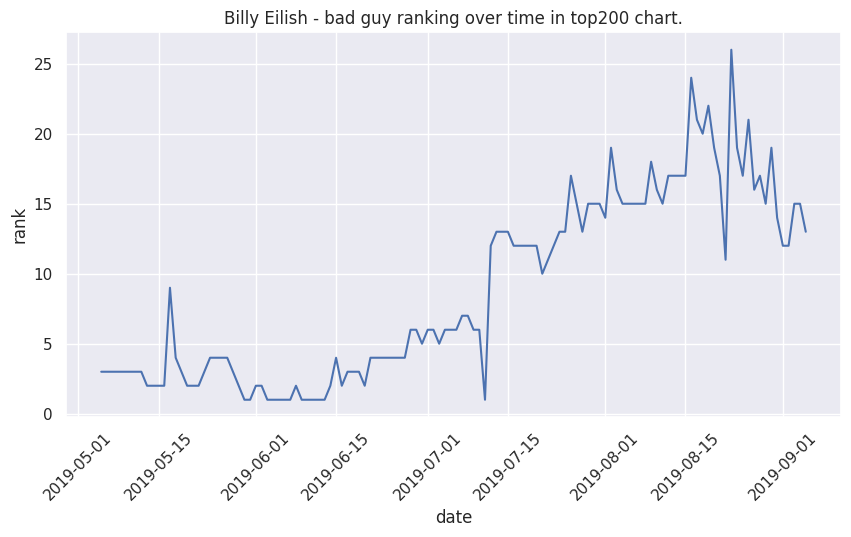

In [207]:
# rank changes over time for given parameters


choosen_start_date = '2019-05-05'
choosen_end_date = '2019-09-05'
choosen_artist = 'Billy Eilish'
choosen_title = 'bad guy'
choosen_region = 'United States'
choosen_chart = 'top200'

data_filter = dataframe['date'].between(choosen_start_date, choosen_end_date)
artist_filter = dataframe['artist'] == choosen_artist
title_filter = dataframe['title'] == choosen_title
region_filter = dataframe['region'] == choosen_region
chart_filter = dataframe['chart'] == choosen_chart

title = f'{choosen_artist} - {choosen_title} ranking over time in {choosen_chart} chart.'

rank_changes_data = dataframe[data_filter & region_filter & chart_filter & title_filter].sort_values(by='date')

plt.figure(figsize=(10,5))
plt.setp(plt.xticks()[1], rotation=45)

sns.lineplot(data=rank_changes_data, x='date', y='rank', color='b').set_title(title)





In [206]:
# songs in choosen charts for given parameters

unique_values = some_other_data['title'].drop_duplicates()
some_other_data[unique_values].head()

KeyError: "None of [Index(['Can I', 'Chicago Freestyle (feat. Giveon)', 'Deep Pockets',\n       'Demons (feat. Fivio Foreign & Sosa Geek)', 'Desires (with Future)',\n       'From Florida With Love', 'God's Plan', 'In My Feelings', 'Landed',\n       'Losses', 'Money In The Grave (Drake ft. Rick Ross)', 'Nice For What',\n       'Nonstop', 'Not You Too (feat. Chris Brown)',\n       'Pain 1993 (with Playboi Carti)', 'Passionfruit', 'Time Flies',\n       'Toosie Slide', 'War', 'When To Say When', 'Trust Issues', 'Omertà',\n       'Dreams Money Can Buy', 'How Bout Now', '4pm in Calabasas',\n       '5 Am in Toronto', 'Club Paradise', 'Days in The East', 'Draft Day',\n       'Free Spirit (feat. Rick Ross)',\n       'Girls Love Beyoncé (feat. James Fauntleroy)', 'Heat Of The Moment',\n       'I Get Lonely', 'Jodeci Freestyle (feat. J. Cole)', 'My Side',\n       'Paris Morton Music', 'The Motion', 'Behind Barz - Bonus',\n       'Laugh Now Cry Later (feat. Lil Durk)',\n       'Wants and Needs (feat. Lil Baby)', 'What’s Next',\n       'Lemon Pepper Freestyle (feat. Rick Ross)', '7am On Bridle Path',\n       'Champagne Poetry', 'F*****g Fans', 'Fair Trade (with Travis Scott)',\n       'Fountains (with Tems)', 'Girls Want Girls (with Lil Baby)',\n       'IMY2 (with Kid Cudi)', 'In The Bible (with Lil Durk & Giveon)',\n       'Knife Talk (with 21 Savage ft. Project Pat)', 'Love All (with JAY-Z)',\n       'No Friends In The Industry', 'Papi’s Home', 'Pipe Down',\n       'Race My Mind', 'TSU', 'The Remorse',\n       'Way 2 Sexy (with Future & Young Thug)',\n       'You Only Live Twice (with Lil Wayne & Rick Ross)'],\n      dtype='object')] are in the [columns]"

,title,rank,date,artist,url,region,chart,trend,streams
92434,Can I,63,2019-08-02,Drake,https://open.spotify.com/track/3e0ZGE7Gp034iLk...,United States,top200,NEW_ENTRY,435912
202026,Can I,107,2019-08-03,Drake,https://open.spotify.com/track/3e0ZGE7Gp034iLk...,United States,top200,MOVE_DOWN,291788
187337,Chicago Freestyle (feat. Giveon),136,2021-03-09,Drake,https://open.spotify.com/track/4wVOKKEHUJxHCFF...,United States,top200,MOVE_DOWN,237303
214209,Chicago Freestyle (feat. Giveon),30,2020-05-22,Drake,https://open.spotify.com/track/4wVOKKEHUJxHCFF...,United States,top200,MOVE_DOWN,643769
422078,Chicago Freestyle (feat. Giveon),50,2020-07-23,Drake,https://open.spotify.com/track/4wVOKKEHUJxHCFF...,United States,top200,MOVE_DOWN,463795
